In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import seaborn as sns

In [537]:
flight_data=pd.read_csv("Flight_on_time_HIX.csv")

weather_data=pd.read_csv("weather.csv")

flight_data['Actual_Departure_Time'] = flight_data['Actual_Departure_Time'].apply(np.int64)

flight_data['Actual_Arrival_Time'] = flight_data['Actual_Arrival_Time'].apply(np.int64)

In [538]:
flight_data.dtypes

Airline                     object
Flight_Number                int64
Plane_ID                    object
FlightDate                  object
Origin_Airport              object
Destination_Airport         object
Flight_Distance              int64
Scheduled_Departure_Time     int64
Actual_Departure_Time        int64
Departure_Delay_Minutes      int64
Departure_Taxi               int64
Departure_WheelsOff          int64
Scheduled_Arrival_Time       int64
Actual_Arrival_Time          int64
Arrival_Delay_Minutes        int64
Arrival_Taxi                 int64
Arrival_WheelsOn             int64
Delay_Reason                object
dtype: object

In [539]:
flight_data["FlightDate"]

0         12/1/2019
1         12/1/2019
2         12/1/2019
3         12/1/2019
4         12/1/2019
            ...    
65664    12/31/2019
65665    12/31/2019
65666    12/31/2019
65667    12/31/2019
65668    12/31/2019
Name: FlightDate, Length: 65669, dtype: object

In [540]:
weather_data=weather_data.query("airport=='Highland'")

In [541]:
s1="000"
s2="2"
s3="{}{}".format("000",s2)
print(s3)
s3[0:2]

0002


'00'

In [542]:
def hour_extract(number):
  
  if(len(str(number))==1):
    s3="{}{}".format("000",number)
    return(s3[0:2])
  
  if(len(str(number))==2):
    s3="{}{}".format("00",number)
    return(s3[0:2])
  
  if(len(str(number))==3):
    s3="{}{}".format("0",number)
    return(s3[0:2])
  
  if(number==2400):
    return("00")

  if(len(str(number))==4):
    s3=str(number)
    return(s3[0:2])

In [543]:
def mins_extract(number):
  
  if(len(str(number))==1):
    s3="{}{}".format("000",number)
    return(s3[2:4])
  
  if(len(str(number))==2):
    s3="{}{}".format("00",number)
    return(s3[2:4])
  
  if(len(str(number))==3):
    s3="{}{}".format("0",number)
    return(s3[2:4])
  
  if(number==2400):
    return("00")

  if(len(str(number))==4):
    s3=str(number)
    return(s3[2:4])

In [544]:
def mins_extract(date,hours):
    return("{} {}{}".format(date,hours,":00"))

In [545]:
print(mins_extract("01-12-2019","23"))

01-12-2019 23:00


In [546]:
from datetime import datetime

def date_format(date):
    ch = '/'
    if ch in date:
        return(datetime.strptime(date, '%m/%d/%Y').strftime('%d-%m-%Y'))
    else:
        return date

In [547]:
#flight_data['FlightDate'] = flight_data['FlightDate'].applymap(date_format)

flight_data['FlightDate'] = flight_data['FlightDate'].apply(date_format)

In [548]:
flight_data_departure=flight_data.query("Origin_Airport=='HIX'")

In [549]:
flight_data_arrival=flight_data.query("Destination_Airport=='HIX'")

In [550]:
flight_data_arrival.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,01-12-2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft
1,TR,3776,GDISCI,01-12-2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,Unknown
7,CA,6526,GCDTFM,01-12-2019,TLM,HIX,977,10,22,12,18,40,259,252,0,10,242,Unknown
8,CA,7201,GBDVFM,01-12-2019,UKP,HIX,763,10,2358,0,24,22,202,138,0,6,132,Unknown
41,TR,2967,GIGTAB,01-12-2019,ERM,HIX,1514,30,221,111,11,232,612,735,83,9,726,LateAircraft


In [551]:
flight_data_arrival['Actual_Arrival_Time_hr'] = flight_data_arrival['Actual_Arrival_Time'].apply(hour_extract)
flight_data_arrival['time'] = flight_data_arrival['FlightDate'] +" "+ flight_data_arrival['Actual_Arrival_Time_hr'] + ":00:00"
flight_data_arrival_merged = pd.merge(flight_data_arrival, weather_data, on='time', how='left')

<ipython-input-551-23365e32a885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data_arrival['Actual_Arrival_Time_hr'] = flight_data_arrival['Actual_Arrival_Time'].apply(hour_extract)
<ipython-input-551-23365e32a885>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data_arrival['time'] = flight_data_arrival['FlightDate'] +" "+ flight_data_arrival['Actual_Arrival_Time_hr'] + ":00:00"


In [552]:
flight_data_departure['Actual_Departure_Time_hr'] = flight_data_departure['Actual_Departure_Time'].apply(hour_extract)
flight_data_departure['time'] = flight_data_departure['FlightDate'] +" "+ flight_data_departure['Actual_Departure_Time_hr'] + ":00:00"
flight_data_departure_merged = pd.merge(flight_data_departure, weather_data, on='time', how='left')

<ipython-input-552-c92e0d557158>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data_departure['Actual_Departure_Time_hr'] = flight_data_departure['Actual_Departure_Time'].apply(hour_extract)
<ipython-input-552-c92e0d557158>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data_departure['time'] = flight_data_departure['FlightDate'] +" "+ flight_data_departure['Actual_Departure_Time_hr'] + ":00:00"


In [553]:
flight_data_departure_merged.to_excel("test_dep.xlsx")

In [554]:
flight_data_departure_merged.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,...,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2
0,RO,4754,GHHWLL,01-12-2019,HIX,IZN,413,10,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XM,5604,GBGWFC,01-12-2019,HIX,IZU,130,10,44,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XM,5612,GBISBC,01-12-2019,HIX,LKF,258,10,234,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XM,5615,GBJODX,01-12-2019,HIX,MPM,475,10,144,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XM,5661,GBESAF,01-12-2019,HIX,EZN,552,10,14,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [555]:
data1=flight_data_departure_merged

In [556]:
df3=flight_data_arrival_merged 
df3.head(5)

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,...,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2
0,TR,4135,GJLOAB,01-12-2019,IYF,HIX,678,1,103,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TR,3776,GDISCI,01-12-2019,HEN,HIX,1700,10,25,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA,6526,GCDTFM,01-12-2019,TLM,HIX,977,10,22,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA,7201,GBDVFM,01-12-2019,UKP,HIX,763,10,2358,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TR,2967,GIGTAB,01-12-2019,ERM,HIX,1514,30,221,111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [557]:
df3 = df3[df3.Delay_Reason!= 'Weather']

df4 = df3[df3.Delay_Reason== 'Weather']
df3.head(5)

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,...,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2
0,TR,4135,GJLOAB,01-12-2019,IYF,HIX,678,1,103,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TR,3776,GDISCI,01-12-2019,HEN,HIX,1700,10,25,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA,6526,GCDTFM,01-12-2019,TLM,HIX,977,10,22,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA,7201,GBDVFM,01-12-2019,UKP,HIX,763,10,2358,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TR,2967,GIGTAB,01-12-2019,ERM,HIX,1514,30,221,111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [558]:
df3=df3.drop(['FlightDate','Flight_Number','Plane_ID','FlightDate','Origin_Airport','Destination_Airport','Scheduled_Departure_Time',
              'Actual_Departure_Time','Departure_WheelsOff','Scheduled_Arrival_Time','Actual_Arrival_Time',
              'Arrival_Taxi','Arrival_WheelsOn','airport','time','summary','precipIntensity','precipProbability','temperature',
              'apparentTemperature','dewPoint','humidity','pressure','windSpeed','windGust','windBearing','cloudCover','uvIndex',
              'visibility','ozone','precipType','precipAccumulation','time2','Unnamed: 0','Delay_Reason'],axis=1)
df3.head(10)

,Airline,Flight_Distance,Departure_Delay_Minutes,Departure_Taxi,Arrival_Delay_Minutes,Actual_Arrival_Time_hr
0,TR,678,62,15,52,02
1,TR,1700,15,21,8,06
2,CA,977,12,18,0,02
3,CA,763,0,24,0,01
4,TR,1514,111,11,83,07
5,YJ,1514,43,19,19,06
6,NR,1440,97,9,83,06
7,TR,1440,0,12,2,05
8,NR,1744,20,13,4,06
9,NR,1846,130,11,126,09


In [559]:
data1.head(60)

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,...,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2
0,RO,4754,GHHWLL,01-12-2019,HIX,IZN,413,10,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XM,5604,GBGWFC,01-12-2019,HIX,IZU,130,10,44,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XM,5612,GBISBC,01-12-2019,HIX,LKF,258,10,234,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XM,5615,GBJODX,01-12-2019,HIX,MPM,475,10,144,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XM,5661,GBESAF,01-12-2019,HIX,EZN,552,10,14,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NR,3741,GDJRDD,01-12-2019,HIX,FJS,836,10,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NR,3535,GEKWHO,01-12-2019,HIX,LRN,1041,10,55,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NR,2895,GGFVEG,01-12-2019,HIX,UFM,867,10,29,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,SN,6159,GEENNK,01-12-2019,HIX,XMP,272,10,121,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SN,6143,GEJTNK,01-12-2019,HIX,VFO,315,10,236,146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [560]:
df1 = data1[data1.Delay_Reason!= 'Weather']
df1 = data1[data1.Delay_Reason== 'Unknown']
df2 = data1[data1.Delay_Reason== 'Weather']
df1.head(5)

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,...,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2
0,RO,4754,GHHWLL,01-12-2019,HIX,IZN,413,10,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XM,5661,GBESAF,01-12-2019,HIX,EZN,552,10,14,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NR,3741,GDJRDD,01-12-2019,HIX,FJS,836,10,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NR,2895,GGFVEG,01-12-2019,HIX,UFM,867,10,29,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,SN,5243,GEJNNK,01-12-2019,HIX,VNU,213,10,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [561]:
df1=df1.drop(['Flight_Number','Plane_ID','Origin_Airport','Destination_Airport','Scheduled_Departure_Time',
              'Actual_Departure_Time','Departure_WheelsOff','Scheduled_Arrival_Time','Actual_Arrival_Time',
              'Arrival_Taxi','Arrival_WheelsOn','airport','time','summary','precipIntensity','precipProbability','temperature',
              'apparentTemperature','dewPoint','humidity','pressure','windSpeed','windGust','windBearing','cloudCover','uvIndex',
              'visibility','ozone','precipType','precipAccumulation','time2','Unnamed: 0','Delay_Reason'],axis=1)
df1.head(10)

,Airline,FlightDate,Flight_Distance,Departure_Delay_Minutes,Departure_Taxi,Arrival_Delay_Minutes,Actual_Departure_Time_hr
0,RO,01-12-2019,413,0,15,0,00
4,XM,01-12-2019,552,4,24,13,00
5,NR,01-12-2019,836,0,14,0,00
7,NR,01-12-2019,867,19,21,11,00
12,SN,01-12-2019,213,0,16,0,00
13,SN,01-12-2019,122,13,16,5,00
14,SN,01-12-2019,268,0,15,0,00
16,XM,01-12-2019,773,0,29,13,00
17,XM,01-12-2019,315,0,24,0,00
18,XM,01-12-2019,577,0,20,2,00


In [562]:
# z_scores = stats.zscore(df1)
# # calculate z-scores of `df`

# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = df1[filtered_entries]

# print(new_df)

In [563]:
df1 = pd.get_dummies(df1, columns = ['Airline'])
print(df1)

       FlightDate  Flight_Distance  Departure_Delay_Minutes  Departure_Taxi  \
0      01-12-2019              413                        0              15   
4      01-12-2019              552                        4              24   
5      01-12-2019              836                        0              14   
7      01-12-2019              867                       19              21   
12     01-12-2019              213                        0              16   
...           ...              ...                      ...             ...   
32851  31-12-2019             1514                        0              13   
32852  31-12-2019              119                        0              18   
32853  31-12-2019             1846                        0              13   
32854  31-12-2019              360                        0              15   
32855  31-12-2019              174                        3              27   

       Arrival_Delay_Minutes Actual_Departure_Time_

In [564]:
df1["Actual_Departure_Time_hr"] = pd.to_numeric(df1["Actual_Departure_Time_hr"])

In [565]:
q1 = df1["Departure_Delay_Minutes"].quantile(0.99)
df1=df1[df1["Departure_Delay_Minutes"] < q1]
q2 = df1["Departure_Taxi"].quantile(0.99)
df1=df1[df1["Departure_Taxi"] < q2]
q3 = df1["Arrival_Delay_Minutes"].quantile(0.99)
df1=df1[df1["Arrival_Delay_Minutes"] < q3]
q4 = df1["Flight_Distance"].quantile(0.99)
df1=df1[df1["Flight_Distance"] < q4]
q5 = df1["Actual_Departure_Time_hr"].quantile(0.99)
df1=df1[df1["Actual_Departure_Time_hr"] < q5]
df1.head(5)

,FlightDate,Flight_Distance,Departure_Delay_Minutes,Departure_Taxi,Arrival_Delay_Minutes,Actual_Departure_Time_hr,Airline_CA,Airline_FH,Airline_GB,Airline_LV,...,Airline_SN,Airline_TJ,Airline_TO,Airline_TR,Airline_UG,Airline_VF,Airline_WC,Airline_XM,Airline_YJ,Airline_ZH
0,01-12-2019,413,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,01-12-2019,836,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,01-12-2019,867,19,21,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,01-12-2019,213,0,16,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13,01-12-2019,122,13,16,5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [566]:
# df1 = pd.get_dummies(df1, columns = ['Delay_Reason'])
# print(df1)

In [567]:
# df1 = pd.get_dummies(df1, columns = ['Departure_Taxi'])
# print(df1)

In [568]:
# df1 = pd.get_dummies(df1, columns = ['Arrival_Delay_Minutes'])
# print(df1)

In [569]:
# ,['Departure_Delay_Minutes'],['Departure_Taxi'],
#                      ['Arrival_Delay_Minutes']

In [570]:
# from numpy import asarray
# from sklearn.preprocessing import OrdinalEncoder
# # define data
# datam = asarray([['RO'], ['XM'], ['NR'],['SN'],['ZH'],['CA'],['FH'],['GB'],
#                 ['LV'],['TJ'],['TO'],['TR'],['UG'],['VF'],['WC'],['YJ'],['ZH']])
# print(datam)
# # define ordinal encoding
# encoder = OrdinalEncoder()
# # transform data
# result = encoder.fit_transform(datam)
# print(result)

In [571]:
df1["Departure_Delay_Minutes"] = np.where(df1["Departure_Delay_Minutes"] > 0, 1, 0)

y=df1["Departure_Delay_Minutes"]

In [572]:
feature_cols=['Flight_Distance','Actual_Departure_Time_hr','Arrival_Delay_Minutes','Departure_Taxi','Airline_CA']
x=df1[feature_cols]
y=df1["Departure_Delay_Minutes"]

In [573]:
from sklearn.model_selection import train_test_split

In [574]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [575]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_test)

In [576]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
classifier=sm.Logit(y_train, x_train).fit()
classifier.summary()
#drop as per feature importance

Optimization terminated successfully.
         Current function value: 0.427310
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     Departure_Delay_Minutes   No. Observations:                16607
Model:                               Logit   Df Residuals:                    16601
Method:                                MLE   Df Model:                            5
Date:                     Sat, 30 Jul 2022   Pseudo R-squ.:                  0.1014
Time:                             19:42:26   Log-Likelihood:                -7096.3
converged:                            True   LL-Null:                       -7897.4
Covariance Type:                 nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.5525      0.096    -16.091      0.000      -1.742      -1.363
Flight_Distance              0.0005   4.71e-05     11.127      0.000       0.000       0.001
Actual_Departure_Time_hr     0.0324      0.005      6.928      0.000       0.023       0.042
Arrival_Delay_Minutes        0.2774      0.008     35.459      0.000       0.262       0.293
Departure_Taxi              -0.0560      0.003    -16.982      0.000      -0.062      -0.050
Airline_CA                   0.1540      0.061      2.510      0.012       0.034       0.274
============================================================================================
"""

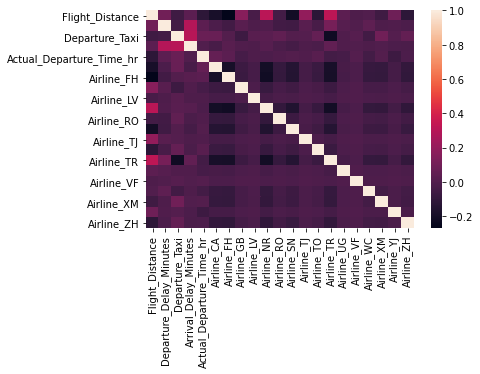

In [577]:
sns.heatmap(df1.corr())
plt.show()

In [578]:
np.asarray(df1)

array([['01-12-2019', 413, 0, ..., 0, 0, 0],
       ['01-12-2019', 836, 0, ..., 0, 0, 0],
       ['01-12-2019', 867, 1, ..., 0, 0, 0],
       ...,
       ['31-12-2019', 119, 0, ..., 0, 0, 0],
       ['31-12-2019', 360, 0, ..., 0, 0, 0],
       ['31-12-2019', 174, 1, ..., 0, 0, 0]], dtype=object)

In [579]:
from statsmodels.multivariate.pca import PCA
from locale import normalize
pc = PCA (df1, ncomp=3, standardize=True, demean=True,normalize=False)

ValueError: could not convert string to float: '01-12-2019'

In [ ]:
df_comp =pc.loadings.T
df_comp

In [ ]:
X_factors = pc.factors
X_factors

In [ ]:
# X_pca=sm.add_constant(X_factors)
# model=sm.OLS(Y,X_pca).fit()
# model.summary()

In [ ]:
from statsmodels.multivariate.factor import Factor
model= Factor(df1).fit()
model.plot_scree()
plt.show()